In [47]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import random

In [48]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [49]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [50]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [51]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [52]:
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

In [35]:
model = Sequential()

In [36]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(2, 2))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.add(Conv2D(64, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(2, 2))

In [38]:
model.add(Flatten())
model.add(Dropout(0.5))  # Regularization
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [40]:
history = model.fit(datagen.flow(x_train, y_train_cat, batch_size=64),
                    epochs=10,
                    validation_data=(x_test, y_test_cat))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 68s 69ms/step - accuracy: 0.3965 - loss: 1.6602 - val_accuracy: 0.9607 - val_loss: 0.1457
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 70ms/step - accuracy: 0.8968 - loss: 0.3322 - val_accuracy: 0.9725 - val_loss: 0.0948
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 69ms/step - accuracy: 0.9237 - loss: 0.2442 - val_accuracy: 0.9768 - val_loss: 0.0706
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 69ms/step - accuracy: 0.9384 - loss: 0.1978 - val_accuracy: 0.9826 - val_loss: 0.0611
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 70ms/step - accuracy: 0.9458 - loss: 0.1697 - val_accuracy: 0.9837 - val_loss: 0.0502
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 70ms/step - accuracy: 0.9538 - loss: 0.1488 - val_accuracy: 0.9841 - val_loss: 0.0462
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 69ms/step - accuracy: 0.9573 - loss: 0.1377 - val_accuracy: 0.9866 - val_loss: 0.0438
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 66s 71ms/step - accuracy: 0.9619 - loss: 0.1253 - val_accurac

In [41]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


In [42]:
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))


📄 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       1.00      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [44]:
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Confusion Matrix:
 [[ 971    0    0    3    1    0    4    1    0    0]
 [   0 1128    3    1    0    0    1    2    0    0]
 [   1    0 1017    6    0    0    0    8    0    0]
 [   0    0    0 1008    0    0    0    1    1    0]
 [   0    1    0    0  972    0    0    1    0    8]
 [   0    0    0   13    0  875    1    1    0    2]
 [   1    2    1    2    3    8  941    0    0    0]
 [   0    0    5    1    0    0    0 1020    0    2]
 [   5    0    4    5    2    4    3    3  941    7]
 [   0    1    0    3    5    3    0   10    0  987]]


In [45]:
def predict_from_user_input():
    try:
        digit = int(input("Enter a digit (0–9): "))
        if digit < 0 or digit > 9:
            print("Please enter a valid digit.")
            return
        indices = np.where(y_test == digit)[0]
        if len(indices) == 0:
            print("No sample found.")
            return
        idx = random.choice(indices)
        img = x_test[idx]
        label = y_test[idx]

        pred = model.predict(img.reshape(1, 28, 28, 1))
        pred_digit = np.argmax(pred)

        plt.imshow(img.reshape(28, 28), cmap='gray')
        plt.title(f"Actual: {label} | Predicted: {pred_digit}")
        plt.axis('off')
        plt.show()

    except ValueError:
        print("Invalid input. Please enter a digit.")

Enter a digit (0–9): 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


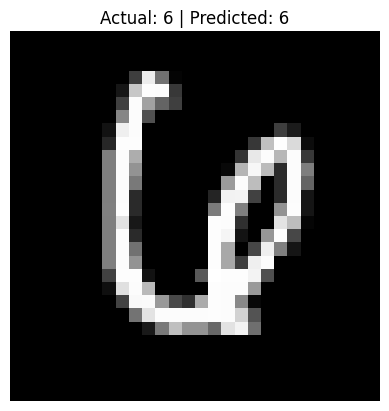

In [46]:
predict_from_user_input()